# **Esercizio Machine Learning**

Creare un modello di classificazione avanzato utilizzando il dataset "Wine" di scikit-learn. Il modello dovrà:

In [40]:
from sklearn.datasets import load_wine
data = load_wine()
X = data.data 
y = data.target

1. Pre-elaborare i dati con scaling standard.

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

2. Ridurre la dimensionalità con PCA per migliorare l'efficienza computazionale.

    Riduce la dimensionalità dei dati mantenendo solo le componenti principali più significative.

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

3. Utilizzare un modello di Gradient Boosting Classifier.

    Algoritmo di apprendimento automatico basato sull'idea di boosting, che combina più modelli deboli per ottenere un modello forte e performante.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [47]:
model = GradientBoostingClassifier(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       0.90      0.90      0.90        21
           2       1.00      0.79      0.88        14

    accuracy                           0.91        54
   macro avg       0.92      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



In [51]:
cm = confusion_matrix(y_test, y_pred)

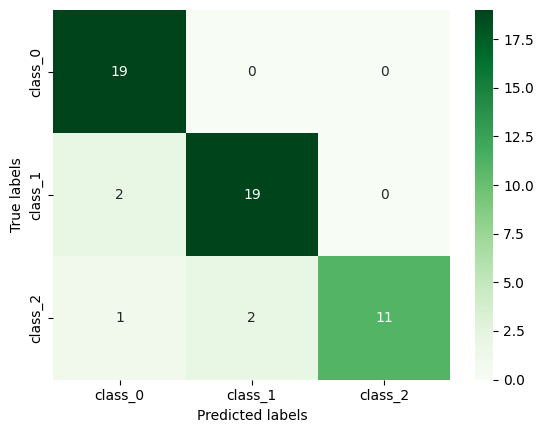

In [52]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

4. Ottimizzare gli iperparametri con RandomizedSearchCV.

    Ottimizzazione degli iperparametri che esplora casualmente una distribuzione di possibili combinazioni di parametri per trovare la migliore configurazione per un modello.

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [54]:
param_grid = {
    'n_estimators': randint(50, 200),           # Numero di alberi
    'max_depth': randint(3, 10)                 # Profondità albero decisionale
}
grid_search = RandomizedSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Migliori parametri: {grid_search.best_params_}")

Migliori parametri: {'max_depth': 3, 'n_estimators': 140}


In [65]:
crossmodel = GradientBoostingClassifier(n_estimators=grid_search.best_params_["n_estimators"], max_depth=grid_search.best_params_["max_depth"])
crossmodel.fit(X_train, y_train)
y_crosspred = crossmodel.predict(X_test)

In [67]:
print(classification_report(y_test, y_crosspred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         9

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [68]:
cm = confusion_matrix(y_test, y_crosspred)

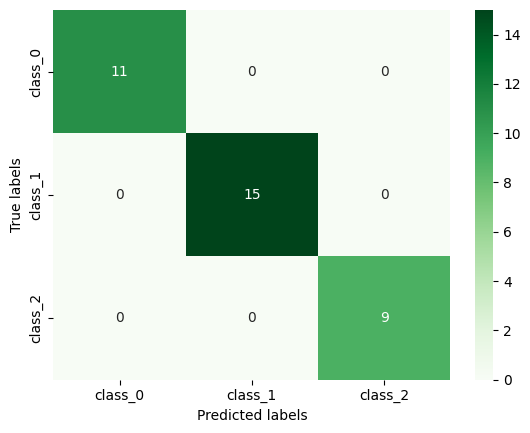

In [69]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

5. Valutare le prestazioni utilizzando StratifiedKFold per mantenere la proporzione delle classi.

    Tecnica di cross-validation che garantisce che la suddivisione dei dati in fold mantenga la stessa proporzione di classi in ciascun fold come nel dataset originale.

In [59]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

`StratifiedKFold` divide i dati in 5 fold mantenendo la proporzioni delle classi in fold.

In [70]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [72]:
param_grid = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
}

In [78]:
random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=param_grid,
    cv=cv,  # Usa StratifiedKFold per la cross-validation
    scoring='accuracy',
    random_state=42)

In [79]:
random_search.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000266CCB83790>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000266CAC206D0>},
                   random_state=42, scoring='accuracy')

In [80]:
print(f"Migliori parametri: {random_search.best_params_}")
print(f"Miglior score: {random_search.best_score_}")

Migliori parametri: {'max_depth': 9, 'n_estimators': 142}
Miglior score: 0.9326984126984126


In [82]:
model2 = GradientBoostingClassifier(n_estimators=random_search.best_params_["n_estimators"], max_depth=random_search.best_params_["max_depth"])
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [83]:
print(classification_report(y_test, y_crosspred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        35
   macro avg       0.98      0.96      0.97        35
weighted avg       0.97      0.97      0.97        35



In [84]:
cm = confusion_matrix(y_test, y_pred2)

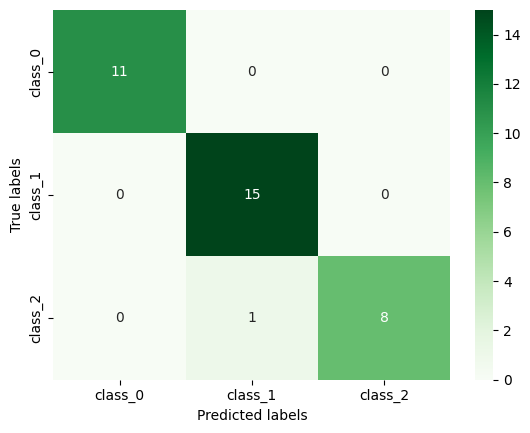

In [85]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()